# Figure 2: Sample Normalized SFHs

This notebook generates Figure 2 showing sample normalized star formation histories from each simulation.

The figure shows:
1. Sample SFHs from different stellar mass bins (10^9-10^10, 10^10-10^11, 10^11-10^12 M_sun)
2. Normalized SFHs for each simulation

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import pickle

# Add src to path
sys.path.append('../src')

from utils.analysis import (sim_name, zoom_name, 
                           colors, times)
from utils.plotting import draw_grid_A

from matplotlib import rc # for text in plots to take Latex font
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Define axis labels
SM_axis_label = r'$M_*$ [$M_{\odot}$]'
SFR_axis_label = r'${\rm SFR}$ [$M_{\odot}$/yr]'
sSFH_axis_label = r'${\rm sSFR}$ [yr$^{-1}$]'
times_axis_label = r'$\mathrm{Time\ (Gyr)}$'

%matplotlib inline

## Load Processed Data

In [5]:
# Load processed simulation data (with mass cuts)
with open('../data/sim_data_processed.pkl', 'rb') as f:
    sim_data = pickle.load(f)

# Load combined normalized SFHs and reconstruct by simulation
combined_sfh = np.load('../data/combined_sfh.npy')
combined_labels = np.load('../data/combined_labels.npy')

# Reconstruct normalized SFHs by simulation
for i, sim in enumerate(sim_name):
    if sim_data[sim] is not None:
        sim_mask = combined_labels == i
        sim_data[sim]['sfh'] = combined_sfh[sim_mask]

print("Loaded processed simulation data:")
for sim in sim_name:
    if sim_data[sim] is not None:
        print(f"{sim:>15s}: {sim_data[sim]['ngal']:>8,d} galaxies")

Loaded processed simulation data:
          EAGLE:    7,445 galaxies
      Illustris:   19,354 galaxies
   IllustrisTNG:   12,220 galaxies
         Mufasa:    1,900 galaxies
          Simba:    1,982 galaxies
         SC-SAM:   12,821 galaxies
UniverseMachine:    7,361 galaxies


In [20]:
# Repeat for zoom-in simulations
with open('../data/zoom_data_processed.pkl', 'rb') as f:
    zoom_data = pickle.load(f)

zoom_sfh = np.load('../data/zoom_sfh.npy')
zoom_labels = np.load('../data/zoom_labels.npy')

for i, sim in enumerate(zoom_name):
    if zoom_data[sim] is not None:
        sim_mask = zoom_labels == i
        zoom_data[sim]['sfh'] = zoom_sfh[sim_mask]

print("Loaded processed zoom-in simulation data:")
for sim in zoom_name:
    if zoom_data[sim] is not None:
        print(f"{sim:>15s}: {zoom_data[sim]['ngal']:>8,d} galaxies")

Loaded processed zoom-in simulation data:
         FIRE-2:       22 galaxies
            g14:        8 galaxies
      Marvel_JL:        5 galaxies


## Generate Random Sample SFHs from Mass Bins

Select random galaxies from different stellar mass bins for each of the main simulations. For the zoom-in simulations, we will use all galaxies in a given mass bin.

In [104]:
# Set seed for reproducibility
np.random.seed(13)

n_samps = 5

# Select randomly from mass bins
bin9 = {}
bin10 = {}
bin11 = {}
for sim in sim_name:
    if sim_data[sim] is None:
        continue
        
    sm = sim_data[sim]['sm']
    sfh = sim_data[sim]['sfh']  # Use normalized SFH from processed data
    
    if (sim != 'Mufasa') & (sim != 'Simba'):
        mask9 = (sm > 1e9) & (sm < 1e10)
        if np.sum(mask9) > 0:
            arg9 = np.random.randint(0, len(sm[mask9]) - 1, n_samps)

    mask10 = (sm > 1e10) & (sm < 1e11)
    mask11 = (sm > 1e11) & (sm < 1e12)
    
    if np.sum(mask10) > 0:
        arg10 = np.random.randint(0, len(sm[mask10]) - 1, n_samps)
    if np.sum(mask11) > 0:
        arg11 = np.random.randint(0, len(sm[mask11]) - 1, n_samps)

    bin9[sim] = []
    bin10[sim] = []
    bin11[sim] = []

    for i in range(n_samps):
        if (sim != 'Mufasa') & (sim != 'Simba') & (np.sum(mask9) > 0):
            bin9[sim].append(sfh[mask9][arg9[i]])
        if np.sum(mask10) > 0:
            bin10[sim].append(sfh[mask10][arg10[i]])
        if np.sum(mask11) > 0:
            bin11[sim].append(sfh[mask11][arg11[i]])
print("Sample SFHs selected from mass bins for each simulation")

Sample SFHs selected from mass bins for each simulation


In [105]:
# Select randomly from mass bins for zoom-ins
zoom_bin9 = {}
zoom_bin10 = {}
zoom_bin11 = {}
for sim in zoom_name:
    if zoom_data[sim] is None:
        continue

    sm = zoom_data[sim]['sm']
    sfh = zoom_data[sim]['sfh']  # Use normalized SFH from processed data

    mask9 = (sm>1e9) & (sm<1e10)
    mask10 = (sm>1e10) & (sm<1e11)
    mask11 = (sm>1e11) & (sm<1e12)

    zoom_bin9[sim] = sfh[mask9]
    zoom_bin10[sim] = sfh[mask10]
    zoom_bin11[sim] = sfh[mask11]

print("SFHs selected from mass bins for each zoom-in simulation")

SFHs selected from mass bins for each zoom-in simulation


## Generate Figure 2: Sample Normalized SFHs

Create multi-panel figure showing sample normalized star formation histories from each simulation, organized by stellar mass bins.

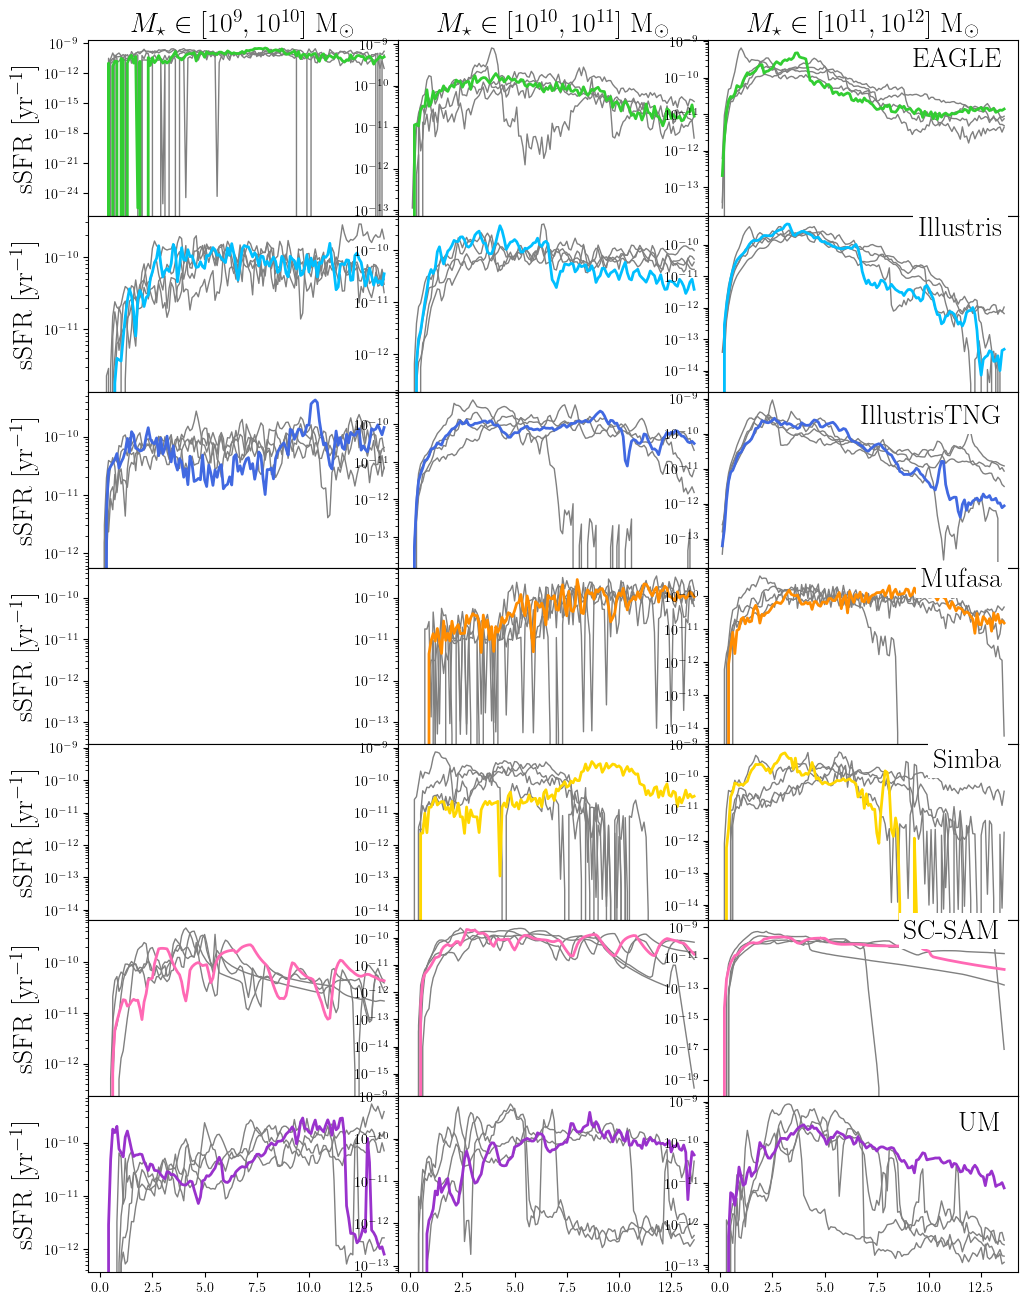

Figure 2 (sample normalized SFHs) generated successfully!


In [ ]:
from matplotlib.ticker import LogLocator
from matplotlib.ticker import MultipleLocator

# Create the multi-panel figure
fig, axs = plt.subplots(7, 3, figsize=(12, 16))
plt.subplots_adjust(wspace=0, hspace=0)

# Plot sample SFHs for each simulation
for i, sim in enumerate(sim_name):
    if sim_data[sim] is None:
        continue

    for j in range(n_samps):
        if j == n_samps - 1:  # Highlight the last sample
            if (sim != 'Mufasa') & (sim != 'Simba') & len(bin9.get(sim, [])) > 0:
                axs[i,0].semilogy(times, bin9[sim][j], c=colors[sim], lw=2) 
            else:
                axs[i,0].semilogy(times, bin10[sim][j], c='w', lw=0) # just to get axis to scale
            if len(bin10.get(sim, [])) > 0:
                axs[i,1].semilogy(times, bin10[sim][j], c=colors[sim], lw=2)
            if len(bin11.get(sim, [])) > 0:
                axs[i,2].semilogy(times, bin11[sim][j], c=colors[sim], lw=2)
        else:
            if (sim != 'Mufasa') & (sim != 'Simba') & len(bin9.get(sim, [])) > 0:
                axs[i,0].semilogy(times, bin9[sim][j], c='grey', lw=1)
            else:
                axs[i,0].semilogy(times, bin10[sim][j], c='w', lw=0)
            if len(bin10.get(sim, [])) > 0:
                axs[i,1].semilogy(times, bin10[sim][j], c='grey', lw=1)
            if len(bin11.get(sim, [])) > 0:
                axs[i,2].semilogy(times, bin11[sim][j], c='grey', lw=1)

    # Axis settings — ensure log-scale ticks are placed correctly
    for j in range(3):
        axs[i,j].set_yscale('log')
        if i == 6:
            axs[i,j].set_xlabel(times_axis_label, fontsize=20)
        axs[i,j].tick_params(
            which='both',
        left=True, bottom=True,
        right=(j == 2),
        labelleft=(j == 0),
        labelright=False,
        labelbottom=(i == 6),
        labeltop=False,
        direction='in',
        labelsize=16
        )
    axs[i,j].set_ylim(10**-12.5, 10**-8.9)
    axs[i,j].set_xlim(0, 13.8)

    # Major ticks at decades, minor ticks at 2-9 * decade
    axs[i,j].yaxis.set_major_locator(LogLocator(base=10.0))
    axs[i,j].yaxis.set_minor_locator(LogLocator(base=10.0, subs=range(2, 10), numticks=100))
    axs[i,j].minorticks_on()

    # Make major/minor tick lengths distinct so minors are visible
    axs[i,j].tick_params(which='major', length=7)
    axs[i,j].tick_params(which='minor', length=4)

    # X-axis ticks: major every 2 Gyr, minor every 0.5 Gyr
    axs[i,j].xaxis.set_major_locator(MultipleLocator(2))
    axs[i,j].xaxis.set_minor_locator(MultipleLocator(0.5))
    
    # Y-axis labels and simulation names
    axs[i,0].set_ylabel(sSFH_axis_label, fontsize=20)
    if sim != 'UniverseMachine':
        axs[i,2].text(13.5, 10**-9.7, sim, ha='right', fontsize=20, 
                      bbox=dict(facecolor='white', edgecolor='white', linewidth=0))
    else:
        axs[i,2].text(13.5, 10**-9.7, 'UM', ha='right', fontsize=20, 
                      bbox=dict(facecolor='white', edgecolor='white', linewidth=0))

# Column titles
axs[0,0].set_title(r'$M_\star \in [10^9,10^{10}]\ \mathrm{M}_\odot$', fontsize=20)
axs[0,1].set_title(r'$M_\star \in [10^{10},10^{11}]\ \mathrm{M}_\odot$', fontsize=20)
axs[0,2].set_title(r'$M_\star \in [10^{11},10^{12}]\ \mathrm{M}_\odot$', fontsize=20)

# Save figure to figures directory
plt.savefig('../figures/sample_SFHs.png', bbox_inches='tight', dpi=300)
plt.savefig('../figures/sample_SFHs.pdf', bbox_inches='tight')

plt.show()

print("Figure 2 (sample normalized SFHs) generated successfully!")

In [ ]:
print("\nFigures saved to:")
print("- ../figures/sample_SFHs.png")
print("- ../figures/sample_SFHs.pdf")
print("\nFigure 2 shows sample normalized star formation histories from each simulation,")
print("with 3 randomly selected galaxies from different stellar mass bins.")
print("Note: Mufasa and Simba only show mass bins 10^10-10^11 and 10^11-10^12 M_sun")
print("due to their higher mass resolution.")